In [61]:
# https://chroniclesofai.com/transfer-learning-with-keras-resnet-50/

import keras
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import PIL
import time
import tensorflow as tf
from keras.layers.core import Dense, Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pathlib

dataset_url = "/content/drive/MyDrive/Fruit Defect Detection for all 3 fruits/dataset_for_all_3_fruits"

data_dir = pathlib.Path(dataset_url)

In [64]:
# from google.colab import drive
# drive.mount('/content/drive')

/content/drive/MyDrive/Fruit Defect Detection for all 3 fruits/dataset_for_all_3_fruits/defected/rottenmango11.jpeg


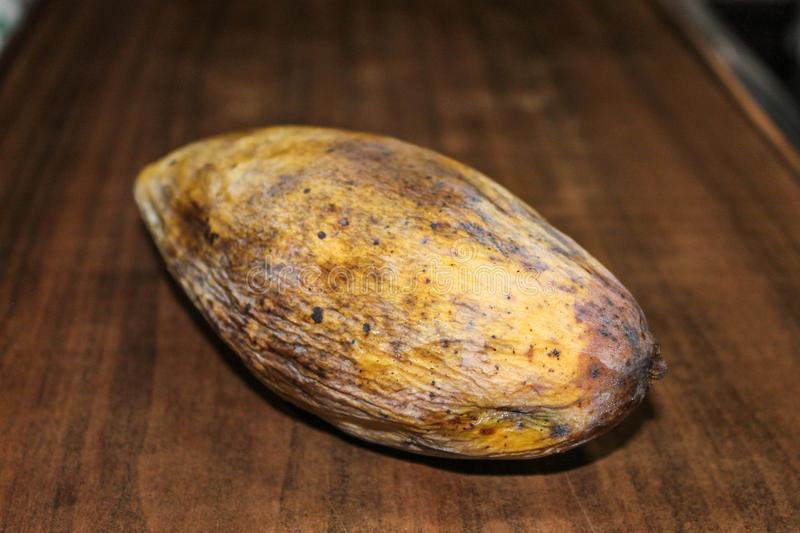

In [65]:
da = list(data_dir.glob('defected/*'))
print(da[453])
PIL.Image.open(str(da[453]))

In [66]:
# Splitting the dataset

# Splitting the ds into training data and resizing it to 224 * 224 to make it uniform.
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3773 files belonging to 2 classes.
Using 3019 files for training.


In [67]:
# Splitting the ds into validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3773 files belonging to 2 classes.
Using 754 files for validation.


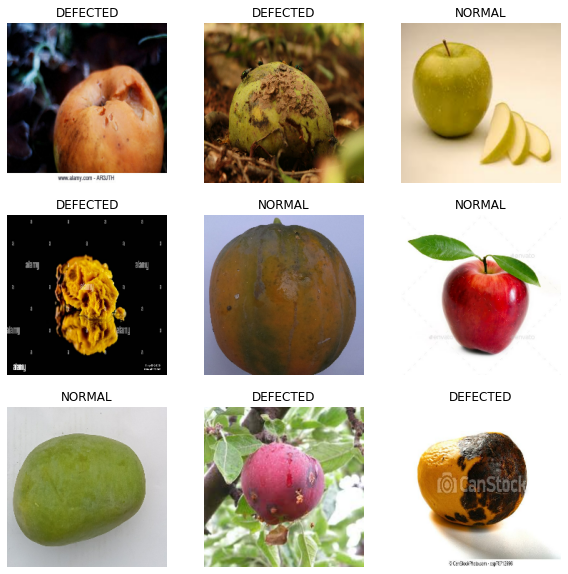

In [68]:
import matplotlib.pyplot as plt
classnames =['DEFECTED', 'NORMAL']

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classnames[labels[i]])
    plt.axis("off")


In [69]:
# Importing EfficientNetB4

EfficientNetB4_model = Sequential()

pretrained_model = tf.keras.applications.EfficientNetB4(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=2,
    classifier_activation="softmax")


for layer in pretrained_model.layers:
        layer.trainable=False

In [70]:
# # Importing pre trained model

# resnet_model.add(pretrained_model)
# resnet_model.add(Flatten())
# resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(Dense(2, activation='softmax'))

In [71]:
# Importing pre trained model

EfficientNetB4_model.add(pretrained_model)
EfficientNetB4_model.add(Flatten())
EfficientNetB4_model.add(Dense(512, activation='relu'))
EfficientNetB4_model.add(Dense(2, activation='softmax'))

In [72]:
# Model Summary

EfficientNetB4_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 flatten_4 (Flatten)         (None, 1792)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               918016    
                                                                 
 dense_9 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 18,592,865
Trainable params: 919,042
Non-trainable params: 17,673,823
_________________________________________________________________


In [73]:
# Training

EfficientNetB4_model.compile(optimizer=Adam(learning_rate=0.000005),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [74]:
epochs=250

history = EfficientNetB4_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/250
95/95 [==============================] - 25s 130ms/step - loss: 0.6693 - accuracy: 0.5803 - val_loss: 0.6324 - val_accuracy: 0.6777
Epoch 2/250
95/95 [==============================] - 10s 97ms/step - loss: 0.5929 - accuracy: 0.7334 - val_loss: 0.5747 - val_accuracy: 0.7401
Epoch 3/250
95/95 [==============================] - 10s 99ms/step - loss: 0.5374 - accuracy: 0.7801 - val_loss: 0.5319 - val_accuracy: 0.7905
Epoch 4/250
95/95 [==============================] - 10s 98ms/step - loss: 0.4987 - accuracy: 0.8036 - val_loss: 0.4978 - val_accuracy: 0.8196
Epoch 5/250
95/95 [==============================] - 10s 98ms/step - loss: 0.4665 - accuracy: 0.8132 - val_loss: 0.4697 - val_accuracy: 0.8289
Epoch 6/250
95/95 [==============================] - 10s 98ms/step - loss: 0.4401 - accuracy: 0.8284 - val_loss: 0.4464 - val_accuracy: 0.8422
Epoch 7/250
95/95 [==============================] - 10s 97ms/step - loss: 0.4189 - accuracy: 0.8384 - val_loss: 0.4267 - val_accuracy: 0.852

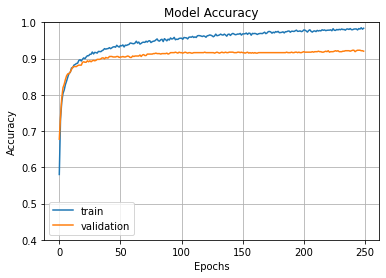

In [75]:
  # Model Evaluation

  fig1 = plt.gcf()
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.axis(ymin=0.4,ymax=1)
  plt.grid()
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'])
  plt.show()

In [76]:
EfficientNetB4_model.save("/content/drive/MyDrive/Fruit Defect Detection for all 3 fruits/for_all_3_fruits_my_EfficientNetB4_model")

# After trainig model once, only run cells below this cell 

In [131]:
EfficientNetB4_model = keras.models.load_model("/content/drive/MyDrive/Fruit Defect Detection for all 3 fruits/for_all_3_fruits_my_EfficientNetB4_model")

In [132]:
EfficientNetB4_model.evaluate(val_ds)

24/24 [==============================] - 6s 52ms/step - loss: 0.2054 - accuracy: 0.9204


[0.20544810593128204, 0.9204244017601013]

In [133]:
predictions = np.array([])
labels =  np.array([])
for x, y in val_ds:
  predicted_categories = np.argmax(EfficientNetB4_model.predict(x), axis = 1)
  predictions = np.concatenate([predictions, predicted_categories])
  labels = np.concatenate([labels, y.numpy()], axis=0)

tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

1/1 [==============================] - 3s 3s/step


array([[352,  27],
       [ 33, 342]], dtype=int32)

In [134]:
print(classification_report(labels, predictions, target_names=classnames))

              precision    recall  f1-score   support

    DEFECTED       0.91      0.93      0.92       379
      NORMAL       0.93      0.91      0.92       375

    accuracy                           0.92       754
   macro avg       0.92      0.92      0.92       754
weighted avg       0.92      0.92      0.92       754



In [135]:
# Model Inference

import cv2
da = list(data_dir.glob('normal/*'))

for ele in da:
  image=cv2.imread(str(ele))
  image_resized= cv2.resize(image, (img_height,img_width))
  image=np.expand_dims(image_resized,axis=0)
  PIL.Image.open(str(ele))
  pred=EfficientNetB4_model.predict(image)
  predictions= EfficientNetB4_model.predict(val_ds)
  output_class=classnames[np.argmax(pred)]
  print("The predicted class is", output_class)

24/24 [==============================] - 5s 50ms/step
The predicted class is NORMAL
24/24 [==============================] - 2s 49ms/step
The predicted class is NORMAL
24/24 [==============================] - 2s 48ms/step
The predicted class is NORMAL
24/24 [==============================] - 2s 50ms/step
The predicted class is NORMAL
24/24 [==============================] - 2s 49ms/step
The predicted class is NORMAL
24/24 [==============================] - 2s 50ms/step
The predicted class is NORMAL
24/24 [==============================] - 2s 50ms/step
The predicted class is NORMAL
1/1 [==============================] - 0s 41ms/step


KeyboardInterrupt: ignored

In [136]:
# Model Inference

index = 447

da = list(data_dir.glob('defected/*'))
print(da[index])


import cv2
image=cv2.imread(str(da[index]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

/content/drive/MyDrive/Fruit Defect Detection for all 3 fruits/dataset_for_all_3_fruits/defected/rottenmango3.jpeg


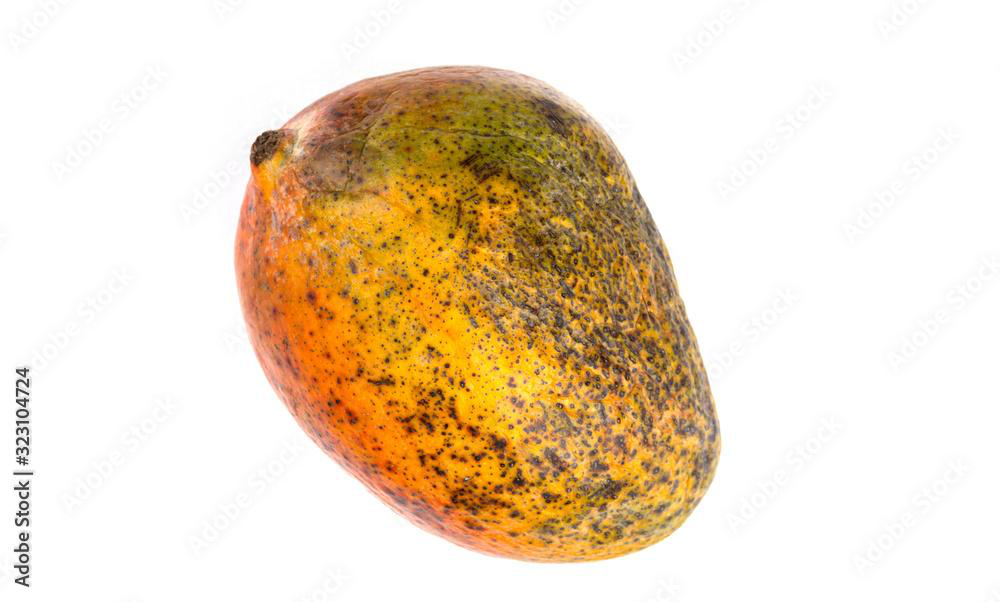

In [137]:
PIL.Image.open(str(da[index]))

In [138]:
start = time.time()
pred=EfficientNetB4_model.predict(image)
end = time.time()

1/1 [==============================] - 0s 42ms/step


In [139]:
print(end-start)

0.0858159065246582


In [140]:
predictions= EfficientNetB4_model.predict(val_ds)

24/24 [==============================] - 2s 49ms/step


In [141]:
output_class=classnames[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is DEFECTED
